C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7192 - loss: 0.9599 - val_accuracy: 0.8655 - val_loss: 0.5498
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7521 - loss: 0.8796 - val_accuracy: 0.8365 - val_loss: 0.7163
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7448 - loss: 0.9064 - val_accuracy: 0.8509 - val_loss: 0.6078
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7537 - loss: 0.8691 - val_accuracy: 0.8468 - val_loss: 0.6619
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7349 - loss: 0.8950 - val_accuracy: 0.8157 - val_loss: 0.7603
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7328 - loss: 0.8876 - val_accuracy: 0.8314 - val_loss: 0.6978
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7398 - loss: 0.8758 - val_accuracy: 0.8071 - val_loss: 0.8148
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7464 - loss: 0.

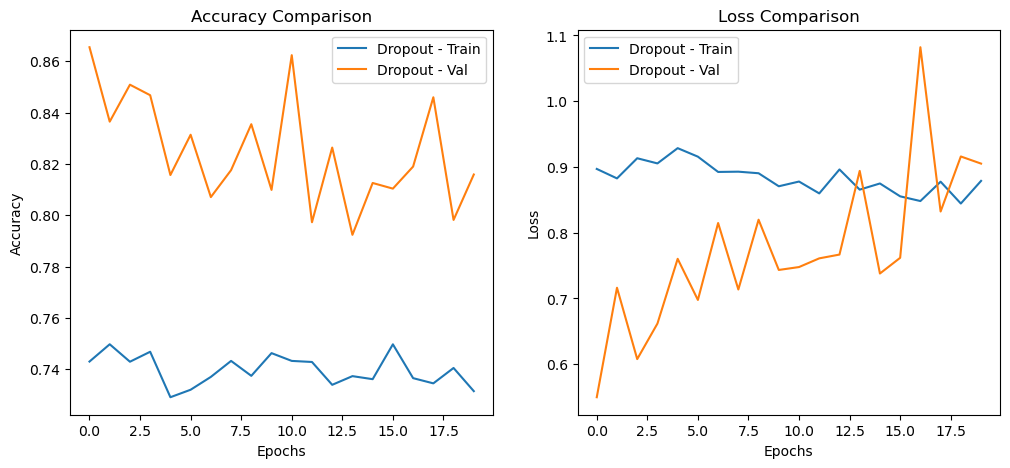

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset (MNIST)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0 to 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model with Dropout
def create_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),  # Flatten 28x28 image into a 1D vector of 784
        Dense(50, activation='relu'),   # Hidden layer with 50 neurons (ReLU activation)
        Dropout(0.2),                   # Dropout layer (20% of neurons turned off randomly)
        Dense(10, activation='softmax') # Output layer (10 neurons for digit classification)
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.05), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Train the model with dropout
model_dropout = create_model_with_dropout()
history_dropout = model_dropout.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)

# Function to plot accuracy and loss comparisons
def plot_comparison(history_dropout, history_baseline=None):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history_dropout.history['accuracy'], label='Dropout - Train')
    plt.plot(history_dropout.history['val_accuracy'], label='Dropout - Val')
    if history_baseline:
        plt.plot(history_baseline.history['accuracy'], label='Baseline - Train', linestyle='dashed')
        plt.plot(history_baseline.history['val_accuracy'], label='Baseline - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy Comparison')

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history_dropout.history['loss'], label='Dropout - Train')
    plt.plot(history_dropout.history['val_loss'], label='Dropout - Val')
    if history_baseline:
        plt.plot(history_baseline.history['loss'], label='Baseline - Train', linestyle='dashed')
        plt.plot(history_baseline.history['val_loss'], label='Baseline - Val', linestyle='dashed')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Loss Comparison')

    plt.show()

# Compare dropout model with Task 4 (without dropout)
plot_comparison(history_dropout)